1.1 Lasso Penalty

In [1]:
%%capture
%run preprocessing.ipynb

In [2]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# Load data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, penalty='l1')
logreg_model.fit(X_train, y_train)

# Now you can predict on your test data
y_pred = logreg_model.predict(X_test)

C:\Users\carla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [3]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# Calculate precision, recall, and F1 score
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1: {:.2f}'.format(f1))

# Generate a classification report
report = metrics.classification_report(y_test, y_pred)
print('Classification report:')
print(report)

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1: 0.97
Classification report:
              precision    recall  f1-score   support

           1       0.94      0.96      0.95     10064
           2       0.99      1.00      0.99     10179
           3       0.97      0.94      0.96     10175

    accuracy                           0.97     30418
   macro avg       0.97      0.97      0.97     30418
weighted avg       0.97      0.97      0.97     30418



<Axes: >

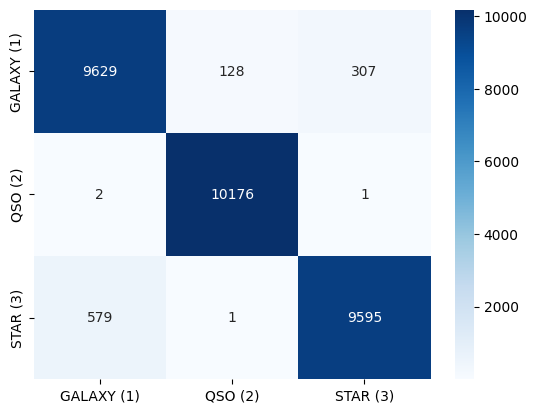

In [4]:
# Decision matrix

# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Create a list of labels
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

In [5]:
# Count the occurrences of each class in the predictions
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

{1: 10210, 2: 10305, 3: 9903}


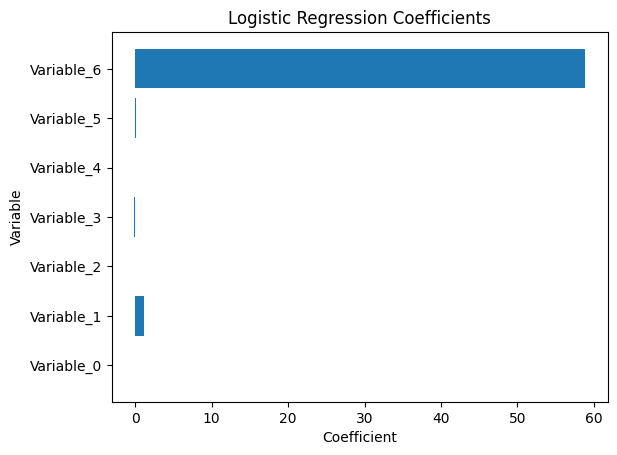

In [6]:
# Obtain the coefficients of the logistic regression model
coefficients = logreg_model.coef_[0]
variable_names = ['Variable_{}'.format(i) for i in range(len(coefficients))]

# Create a bar plot of the coefficients
plt.barh(variable_names, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.title('Logistic Regression Coefficients')
plt.show()

1.2 Ridge Penalty

In [7]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, penalty='l2')
logreg_model.fit(X_train, y_train)

# Now you can predict on your test data
y_pred = logreg_model.predict(X_test)

In [8]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# Calculate precision, recall, and F1 score
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1: {:.2f}'.format(f1))

# Generate a classification report
report = metrics.classification_report(y_test, y_pred)
print('Classification report:')
print(report)

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1: 0.96
Classification report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     10064
           2       0.97      1.00      0.99     10179
           3       0.97      0.94      0.96     10175

    accuracy                           0.96     30418
   macro avg       0.96      0.96      0.96     30418
weighted avg       0.96      0.96      0.96     30418



<Axes: >

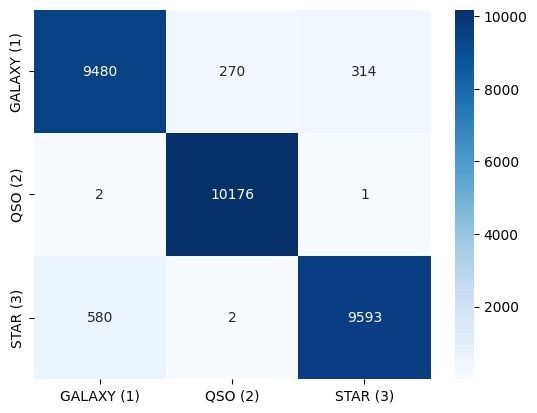

In [9]:
# Decision matrix

# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Create a list of labels
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

<Axes: >

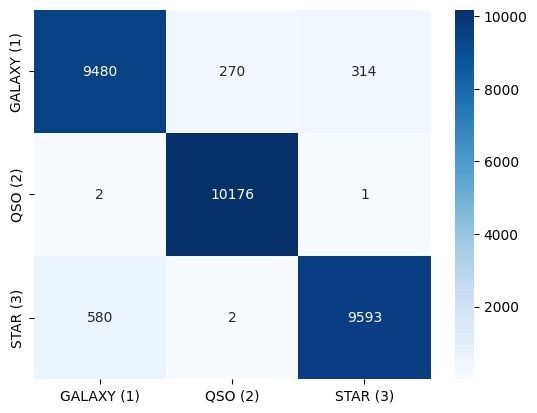

In [10]:
# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Create a list of labels
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

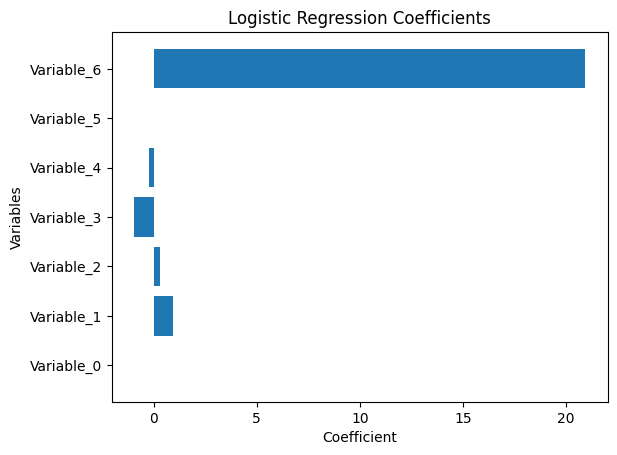

In [11]:
# Obtain the coefficients of the logistic regression model
coefficients = logreg_model.coef_[0]
variable_names = ['Variable_{}'.format(i) for i in range(len(coefficients))]

# Create a bar plot of the coefficients
plt.barh(variable_names, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Variables')
plt.title('Logistic Regression Coefficients')
plt.show()

1.3 Mix Penalty

In [12]:
l1_ratios = [0, 0.001, 0.01, 0.1, 0.5, 0.9, 0.95, 0.99, 0.995, 1]
max_f1 = 0
best_l1_ratio = 0

for l1_ratio in l1_ratios:
    # Create an instance of Logistic Regression Classifier and fit the data.
    logreg_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, penalty='elasticnet', l1_ratio=l1_ratio)
    logreg_model.fit(X_train, y_train)

    # Now you can predict on your test data
    y_pred = logreg_model.predict(X_test)

    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    if f1 > max_f1:
        max_f1 = f1
        best_l1_ratio = l1_ratio

C:\Users\carla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\carla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\carla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\carla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: Conve

In [13]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, penalty='elasticnet', l1_ratio=best_l1_ratio)
logreg_model.fit(X_train, y_train)

# Now you can predict on your test data
y_pred = logreg_model.predict(X_test)

C:\Users\carla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [14]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# Calculate precision, recall, and F1 score
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1: {:.2f}'.format(f1))

# Generate a classification report
report = metrics.classification_report(y_test, y_pred)
print('Classification report:')
print(report)

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1: 0.97
Classification report:
              precision    recall  f1-score   support

           1       0.94      0.96      0.95     10064
           2       0.99      1.00      0.99     10179
           3       0.97      0.94      0.96     10175

    accuracy                           0.97     30418
   macro avg       0.97      0.97      0.97     30418
weighted avg       0.97      0.97      0.97     30418



<Axes: >

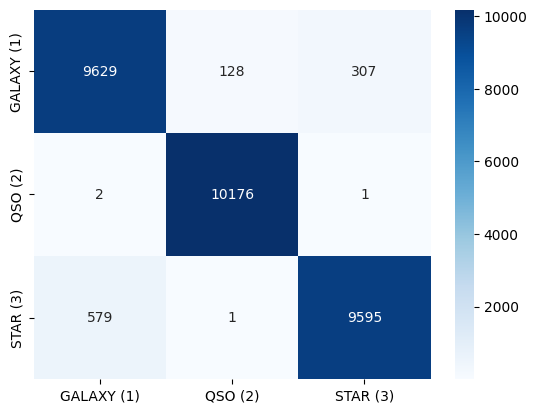

In [15]:
# Decision matrix

# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Create a list of labels
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

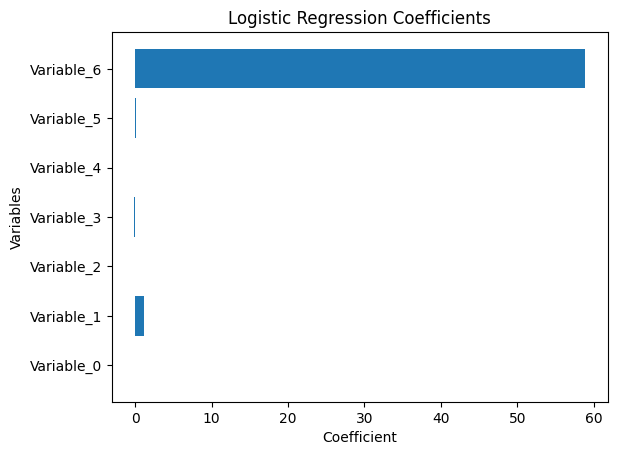

In [16]:
# Obtain the coefficients of the logistic regression model
coefficients = logreg_model.coef_[0]
variable_names = ['Variable_{}'.format(i) for i in range(len(coefficients))]

# Create a bar plot of the coefficients
plt.barh(variable_names, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Variables')
plt.title('Logistic Regression Coefficients')
plt.show()

Conclusion: The best regression model seems to be a lasso penalty